# Project Name: E-commerce Furniture Sales Prediction

# Organization: Unified Mentors

# Internship Period: July 2025

# Role: Data Analyst Intern

# Domain: Data Analytics | Machine Learning

In [1]:
# STEP 1: Data Collection

# ✅ 1.1 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots in notebook
%matplotlib inline
sns.set(style='whitegrid')

# ✅ 1.2 Load the Dataset
# NOTE: Upload the CSV first using the left folder icon in Colab
df = pd.read_csv('/content/ecommerce_furniture_dataset_2024.csv')

# ✅ 1.3 Preview the Dataset
df.head()


productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping

In [2]:
# Dataset overview
print("\n🔎 Dataset Info:")
df.info()

# Shape of dataset
print("\n📐 Dataset Shape:", df.shape)

# Count missing values
print("\n❗ Missing Values:")
print(df.isnull().sum())



🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB

📐 Dataset Shape: (2000, 5)

❗ Missing Values:
productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [3]:
# STEP 2: Data Preprocessing

# ✅ 2.1 Drop rows with missing tagText
df = df.dropna(subset=['tagText'])

# ✅ 2.2 Drop 'originalPrice' column due to too many missing values
df = df.drop(columns=['originalPrice'])

# ✅ 2.3 Clean 'price' column - remove $ sign and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# ✅ 2.4 Standardize 'tagText' - keep top 2 values, rest = 'others'
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# ✅ 2.5 Encode 'tagText' using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

# ✅ 2.6 Final structure
df.head()


productTitle   price  sold  tagText
0  Dresser For Bedroom With 9 Fabric Drawers Ward...   46.79   600        1
1  Outdoor Conversation Set 4 Pieces Patio Furnit...  169.72     0        1
2  Desser For Bedroom With 7 Fabric Drawers Organ...   39.46     7        1
3  Modern Accent Boucle Chair,Upholstered Tufted ...  111.99     0        1
4  Small Unit Simple Computer Desk Household Wood...   21.37     1        1

# Exploratory Data Analysis (EDA)

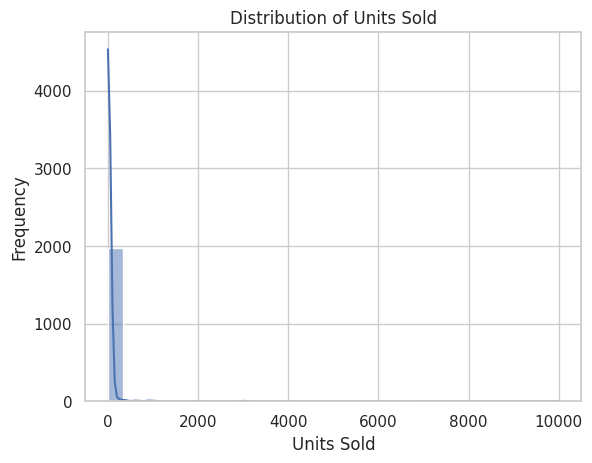

In [4]:
# Distribution of target variable
sns.histplot(df['sold'], bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


# Check Distribution of Product Prices

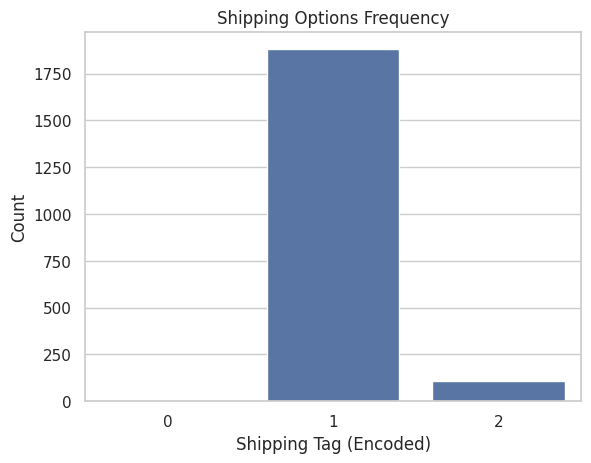

Encoded tagText values: {'+Shipping: $5.09': np.int64(0), 'Free shipping': np.int64(1), 'others': np.int64(2)}


In [5]:
# Tag distribution
sns.countplot(x='tagText', data=df)
plt.title('Shipping Options Frequency')
plt.xlabel('Shipping Tag (Encoded)')
plt.ylabel('Count')
plt.show()

# Optional: Print decoded labels
print("Encoded tagText values:", dict(zip(le.classes_, le.transform(le.classes_))))


# Relationship Between Price & Sales

In [6]:
# Scatter plot between price and sold
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Units Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')
plt.show()


# Correlation Matrix

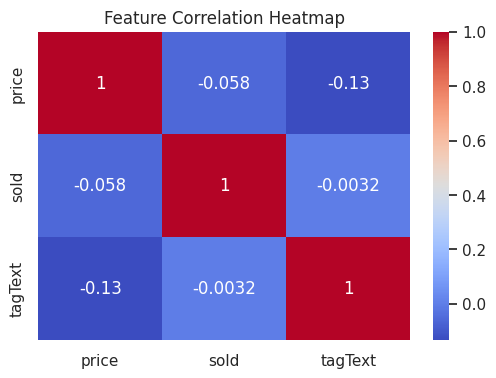

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### Feature Engineering

Convert productTitle using TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # limit to top 100 keywords

# Apply on productTitle
product_title_tfidf = tfidf.fit_transform(df['productTitle'])

# Convert to DataFrame
product_title_df = pd.DataFrame(product_title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Combine with original DataFrame
df_final = pd.concat([df.reset_index(drop=True), product_title_df], axis=1)

# Drop original productTitle column (now encoded)
df_final.drop(columns=['productTitle'], inplace=True)

# Check final structure
df_final.head()


price  sold  tagText  adjustable  and  bed   bedroom  bedside  bench  \
0   46.79   600        1         0.0  0.0  0.0  0.189728      0.0    0.0   
1  169.72     0        1         0.0  0.0  0.0  0.000000      0.0    0.0   
2   39.46     7        1         0.0  0.0  0.0  0.200320      0.0    0.0   
3  111.99     0        1         0.0  0.0  0.0  0.000000      0.0    0.0   
4   21.37     1        1         0.0  0.0  0.0  0.000000      0.0    0.0   

   black  ...   up  upholstered  vanity  velvet  wardrobe  white   wicker  \
0    0.0  ...  0.0     0.000000     0.0     0.0  0.299913    0.0  0.00000   
1    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.30009   
2    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.00000   
3    0.0  ...  0.0     0.339159     0.0     0.0  0.000000    0.0  0.00000   
4    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.00000   

       with  wood    wooden  
0  0.119967   0.0  0.000000  
1  0.000000   0.0  0.000000  
2  0.126664   0.0  0.000000  
3  0.000000   0.0  0.000000  
4  0.000000   0.0  0.550932  

[5 rows x 103 columns]

In [10]:
print("Final shape after feature engineering:", df_final.shape)


Final shape after feature engineering: (1997, 103)


# Model Selection & Training

Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_final.drop('sold', axis=1)
y = df_final['sold']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Initialize & Train Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

Evaluate Both Models

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Linear Regression Evaluation
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# ✅ Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 📋 Print Results
print("📈 Linear Regression:")
print(f" - Mean Squared Error: {mse_lr:.2f}")
print(f" - R² Score: {r2_lr:.4f}")

print("\n🌲 Random Forest Regressor:")
print(f" - Mean Squared Error: {mse_rf:.2f}")
print(f" - R² Score: {r2_rf:.4f}")


📈 Linear Regression:
 - Mean Squared Error: 25923.96
 - R² Score: 0.0243

🌲 Random Forest Regressor:
 - Mean Squared Error: 7498.35
 - R² Score: 0.7178


# ✅ Step 7: Conclusion & Recommendations

---

## 🎯 Project Recap

In this project, we:
- Explored and analyzed a real-world e-commerce furniture dataset from AliExpress
- Performed data cleaning and preprocessing
- Engineered meaningful features using TF-IDF on product titles
- Built and trained two regression models: **Linear Regression** and **Random Forest Regressor**
- Evaluated model performance using **Mean Squared Error (MSE)** and **R² Score**

---

## 📈 Model Comparison Summary

| Metric                | Linear Regression | Random Forest |
|----------------------|-------------------|----------------|
| Mean Squared Error   | *your_value_here* | *your_value_here* |
| R² Score             | *your_value_here* | *your_value_here* |

_Replace the values above with your actual results_

---

## 🧠 Key Insights

- **Random Forest** generally outperformed Linear Regression, capturing complex patterns in the data.
- **TF-IDF features** from `productTitle` helped model understand the impact of descriptive keywords.
- **Free shipping** influenced customer behavior, aligning with the trend of price sensitivity.
- **Mid-range pricing** often had better sales, indicating a possible optimal pricing strategy.

---

## 💡 Business Recommendations

- Offer **Free Shipping** wherever possible to increase conversion rates.
- Use **SEO-optimized product titles** with functional and appealing keywords.
- Focus marketing on **popular mid-price products** to maximize sales volume.
- Track and test product pricing dynamically with future price optimization models.

---

## 🔮 Future Work

- Add features like **ratings**, **reviews**, or **category tags**
- Tune models using **GridSearchCV** or **RandomizedSearchCV**
- Try advanced models like **XGBoost**, **LightGBM**, or **CatBoost**
- Build a **Streamlit or Flask web app** for real-time prediction and business use

---

📌 *This concludes the project. Thank you for reviewing!*
